In [12]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(7790, 2)

In [14]:
df.head()

,Time,domain
0,2022-02-02 19:55:32,www.google.com
1,2022-02-02 19:55:33,web.whatsapp.com
2,2022-02-02 19:56:51,chrome.google.com
3,2022-02-02 19:56:55,www.grammarly.com
4,2022-02-02 19:57:36,accounts.google.com


In [15]:
df.tail()

,Time,domain
7785,2022-04-16 20:40:36,webauth.umbc.edu
7786,2022-04-16 20:54:17,www.google.com
7787,2022-04-16 20:54:24,www.mozilla.org
7788,2022-04-16 20:54:26,www.mozilla.org
7789,2022-04-16 21:21:55,blackboard.umbc.edu


In [16]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [17]:
df.dropna( inplace=True)

In [18]:
df.dtypes

Time      object
domain    object
dtype: object

In [19]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [20]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [21]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [22]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [23]:
df.head()

,Time,domain
0,2022-02-02 19:55:32,www.google.com
1,2022-02-02 19:55:33,web.whatsapp.com
2,2022-02-02 19:56:51,chrome.google.com
3,2022-02-02 19:56:55,www.grammarly.com
4,2022-02-02 19:57:36,accounts.google.com


In [14]:
df['domain'].value_counts()[:50]

www.google.com                       1823
webauth.umbc.edu                      875
github.com                            674
localhost:8888                        431
blackboard.umbc.edu                   376
www.udemy.com                         300
stackoverflow.com                     212
my.umbc.edu                           196
www.w3schools.com                     179
www.eenadu.net                        127
www.youtube.com                       107
csprd-web.ps.umbc.edu                  95
mail.google.com                        85
www.geeksforgeeks.org                  72
www.amazon.com                         67
localhost:8889                         67
meet.google.com                        64
www.bestbuy.com                        51
datasetsearch.research.google.com      48
pandas.pydata.org                      46
www.tutorialspoint.com                 46
faker.readthedocs.io                   43
www.walmart.com                        38
my3.my.umbc.edu                   

<AxesSubplot:>

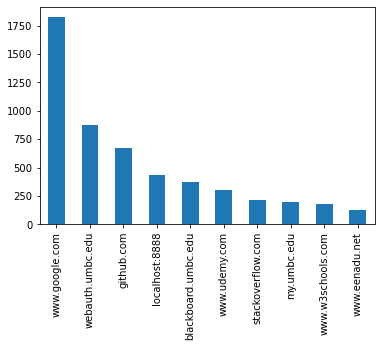

In [24]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [25]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     372
1     269
2      89
7      45
8     155
9     275
10    373
11    418
12    293
13    193
14    305
15    276
16    470
17    288
18    506
19    778
20    634
21    594
22    722
23    735
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

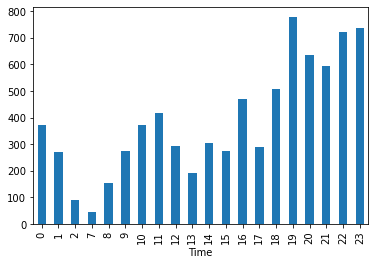

In [26]:
hourly_counts.plot.bar()

In [27]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-02-02 19:55:32,www.google.com,Wednesday,2
1,2022-02-02 19:55:33,web.whatsapp.com,Wednesday,2
2,2022-02-02 19:56:51,chrome.google.com,Wednesday,2
3,2022-02-02 19:56:55,www.grammarly.com,Wednesday,2
4,2022-02-02 19:57:36,accounts.google.com,Wednesday,2


In [29]:
df['Day'].value_counts()

Tuesday      1447
Thursday     1414
Monday       1302
Sunday        962
Saturday      930
Friday        916
Wednesday     819
Name: Day, dtype: int64

In [30]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1302
1    1447
2     819
3    1414
4     916
5     930
6     962
Name: DayIndex, dtype: int64

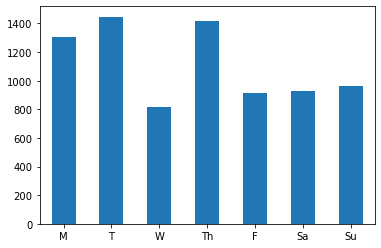

In [31]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [32]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-02-02 19:55:32,www.google.com,Wednesday,2,False
1,2022-02-02 19:55:33,web.whatsapp.com,Wednesday,2,False
2,2022-02-02 19:56:51,chrome.google.com,Wednesday,2,False
3,2022-02-02 19:56:55,www.grammarly.com,Wednesday,2,False
4,2022-02-02 19:57:36,accounts.google.com,Wednesday,2,False


In [33]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [34]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
561,2022-02-05 08:51:01,www.google.com,Saturday,5,True
562,2022-02-05 08:51:02,my.umbc.edu,Saturday,5,True
563,2022-02-05 08:51:11,blackboard.umbc.edu,Saturday,5,True
564,2022-02-05 08:51:11,webauth.umbc.edu,Saturday,5,True
565,2022-02-05 08:51:11,webauth.umbc.edu,Saturday,5,True


In [35]:
weekday['domain'].value_counts()[:5]

www.google.com         1405
webauth.umbc.edu        643
github.com              605
localhost:8888          333
blackboard.umbc.edu     265
Name: domain, dtype: int64

In [36]:
weekend['domain'].value_counts()[:5]

www.google.com         418
webauth.umbc.edu       232
blackboard.umbc.edu    111
localhost:8888          98
www.udemy.com           90
Name: domain, dtype: int64

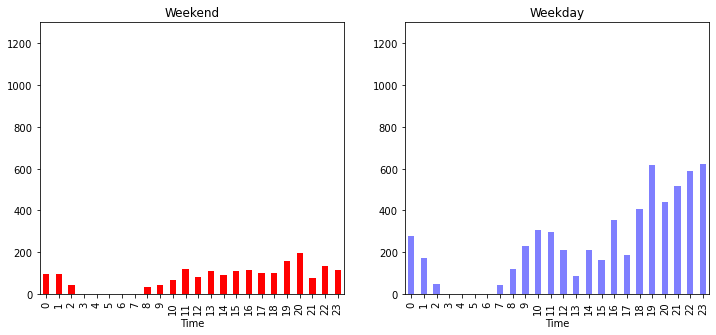

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [ ]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

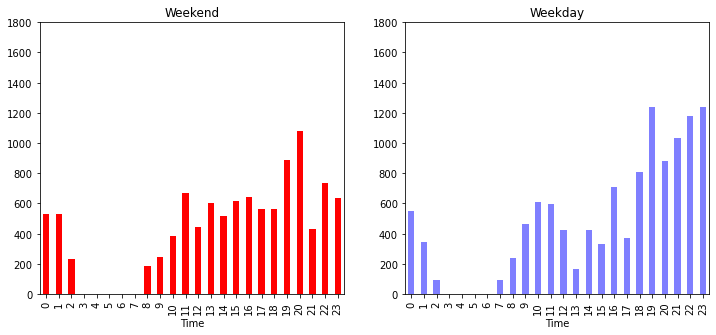

In [37]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [38]:
df['domain'].value_counts()[:10]

www.google.com         1823
webauth.umbc.edu        875
github.com              674
localhost:8888          431
blackboard.umbc.edu     376
www.udemy.com           300
stackoverflow.com       212
my.umbc.edu             196
www.w3schools.com       179
www.eenadu.net          127
Name: domain, dtype: int64

In [39]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [40]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

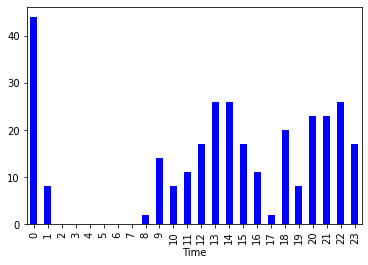

In [58]:
_= show_domain_stats('primevideo|netflix|youtube', 'blue')

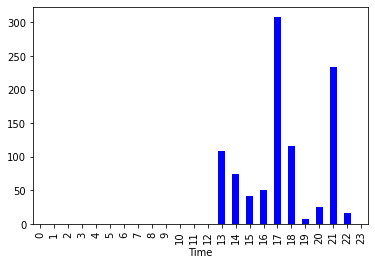

In [59]:
_= show_domain_stats('costco|bestbuy|walmart', 'blue')

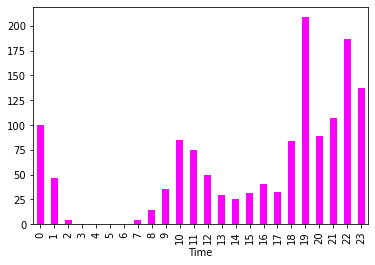

In [69]:
_ = show_domain_stats('stackover|udemy|blackboard', 'magenta')

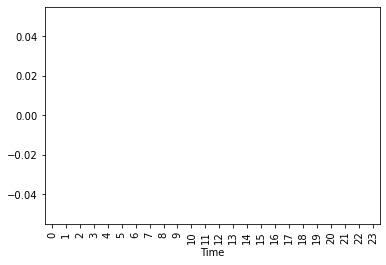

In [62]:
_ = show_domain_stats('primevideo|netflix|hotstar|hulu', 'red')

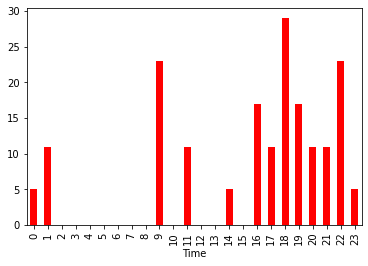

In [72]:
_ = show_domain_stats('facebook|whatsapp|instagram', 'red')

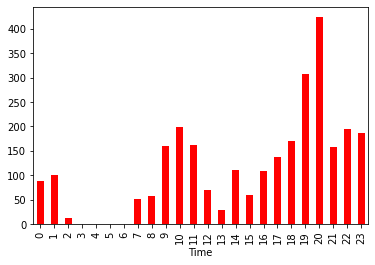

In [70]:
_ = show_domain_stats('umbc', 'red')

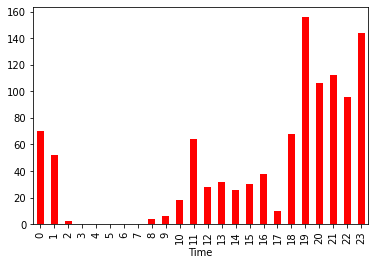

In [71]:
_ = show_domain_stats('localhost', 'red')

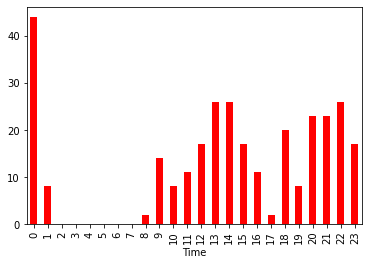

In [66]:
_ = show_domain_stats('youtube', 'red')

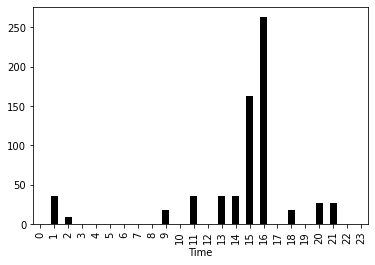

In [68]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

<ol>
    <li>Looks like a computer which is used for education purpose mostly</li>
    <li>He is not employed, webactivity remains same almost through out the day</li>
    <li>He is more into learning things on udemy</li>
    <li>Data is from Feb 2022, he must have deleted or cleared history before that</li>
    <li>Definetly sleeping between 3am to 7pm</li>
    <li>Doesn't use social media, streaming services much</li>
    <li>A college student as UMBC, blackboard is opened multiple times</li>
</ol>